## Environment
Using Kernel: `dan-dev-py312-r433`

-----

In [51]:
# Location of data from and to
from pathlib import Path
import pandas as pd

root_dir_path = Path("..")
wang_root_path = root_dir_path / "derived_data/wang_lab"
ahringer_root_path = root_dir_path / "derived_data/ahringer_lab"
analysis_root_path = root_dir_path / "analysis/wang_ahringer_overlap"

In [52]:

excel_file = ahringer_root_path / "Ahr_All_Tissues.xlsx"

sheets_dict = pd.read_excel(excel_file, sheet_name=None)
ahr_intestine = sheets_dict['intestine']['WBID'].tolist()
ahr_intestine_all = sheets_dict['intestine_all']['WBID'].tolist()

ahr_muscle = sheets_dict['muscle']['WBID'].tolist()
ahr_muscle_all = sheets_dict['muscle_all']['WBID'].tolist()

ahr_hypoderm = sheets_dict['hypoderm']['WBID'].tolist()
ahr_hypoderm_all = sheets_dict['hypoderm_all']['WBID'].tolist()

print(f"Intestine     {len(ahr_intestine):>5,}")
print(f"Intestine All {len(ahr_intestine_all):>5,}")
print(f"Muscle        {len(ahr_muscle):>5,}")
print(f"Muscle All    {len(ahr_muscle_all):>5,}")
print(f"Hypoderm      {len(ahr_hypoderm):>5,}")
print(f"Hypoderm All  {len(ahr_hypoderm_all):>5,}")

Intestine       974
Intestine All 1,882
Muscle          349
Muscle All    1,483
Hypoderm        844
Hypoderm All  1,665


In [53]:

csv_file = wang_root_path / "n2d1_gene_counts_tissue.csv"

n2d1_gene_counts_tissue_df = pd.read_csv(csv_file)
wang_n2d1_intestine = n2d1_gene_counts_tissue_df.loc[n2d1_gene_counts_tissue_df['Intestine'] > 1, 'Wormbase_Id'].tolist()
wang_n2d1_muscle = n2d1_gene_counts_tissue_df.loc[n2d1_gene_counts_tissue_df['Muscle'] > 1, 'Wormbase_Id'].tolist()
wang_n2d1_hypodermis = n2d1_gene_counts_tissue_df.loc[n2d1_gene_counts_tissue_df['Hypodermis'] > 1, 'Wormbase_Id'].tolist()


print(f"Intestine  {len(wang_n2d1_intestine):,}")
print(f"Muscle     {len(wang_n2d1_muscle):,}")
print(f"Hypodermis {len(wang_n2d1_hypodermis):,}")

Intestine  14,193
Muscle     13,845
Hypodermis 15,816


In [54]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

def plot_venn2_diagram(set1, set2, label1="Set 1", label2="Set 2", title="Venn Diagram"):
    """
    Plots a Venn diagram for two sets with formatted labels and summary counts.
    """
    # Create informative labels with total counts
    set1_label = f"{label1}\n({len(set1):,})"
    set2_label = f"{label2}\n({len(set2):,})"

    # Plot Venn diagram
    venn = venn2([set1, set2], set_labels=(set1_label, set2_label),
                 set_colors=('skyblue', 'orange'), alpha=0.6)

    # Format subset labels with commas and adjust font sizes
    for subset_id in ('10', '01', '11'):
        label = venn.get_label_by_id(subset_id)
        if label:
            value = int(label.get_text())
            label.set_text(f"{value:,}")
            label.set_fontsize(12)

    # Set font size for set labels
    for text in venn.set_labels:
        if text:
            text.set_fontsize(12)

    # Print summary counts
    only_set1 = len(set1 - set2)
    only_set2 = len(set2 - set1)
    intersection = len(set1 & set2)


    # Add title and show plot
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

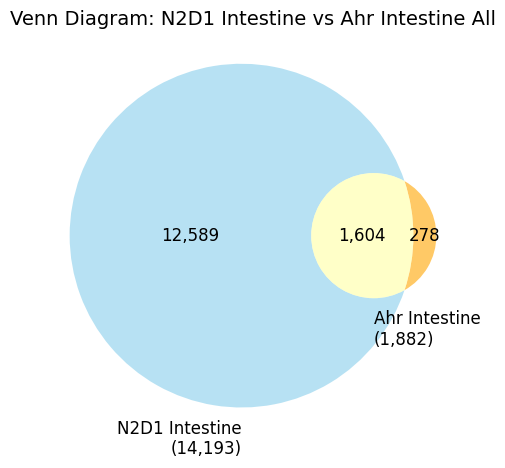

In [55]:
plot_venn2_diagram(
    set1=set(wang_n2d1_intestine),
    set2=set(ahr_intestine_all),
    label1="N2D1 Intestine",
    label2="Ahr Intestine",
    title="Venn Diagram: N2D1 Intestine vs Ahr Intestine All"
)

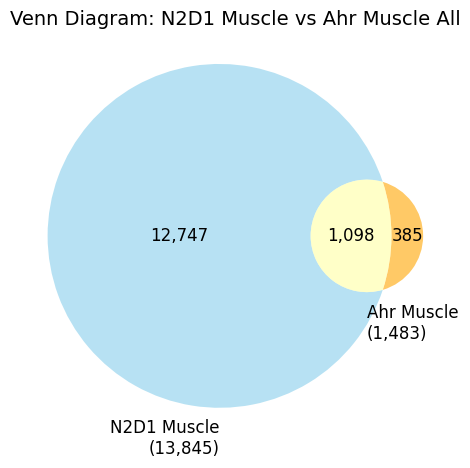

In [56]:
plot_venn2_diagram(
    set1=set(wang_n2d1_muscle),
    set2=set(ahr_muscle_all),
    label1="N2D1 Muscle",
    label2="Ahr Muscle",
    title="Venn Diagram: N2D1 Muscle vs Ahr Muscle All"
)

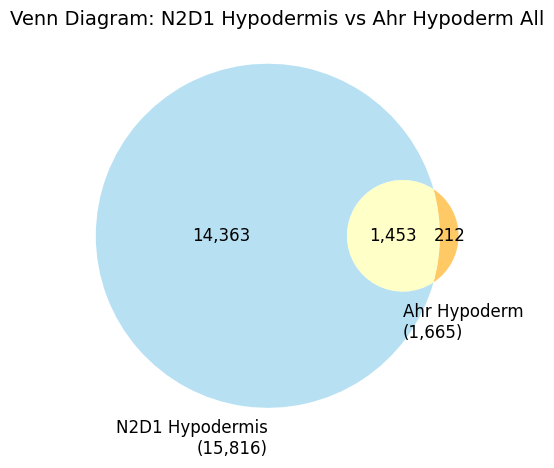

In [57]:
plot_venn2_diagram(
    set1=set(wang_n2d1_hypodermis),
    set2=set(ahr_hypoderm_all),
    label1="N2D1 Hypodermis",
    label2="Ahr Hypoderm",
    title="Venn Diagram: N2D1 Hypodermis vs Ahr Hypoderm All"
)